In [261]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [262]:
terang_kuning = {
    'cb': 'res/terang/nyala/105-4.jpg',
    'beat': 'res/terang/nyala/0-0.jpg',
    # 'mio': 'res/terang/nyala/121-0.jpg', #jelek kecil
    'mio': 'res/terang/nyala/126-12.jpg', #alt
}

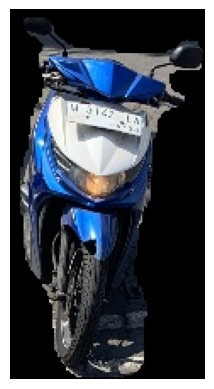

In [263]:
# imej = terang_kuning['cb']
# imej = terang_kuning['beat']
imej = terang_kuning['mio']
image = cv2.imread(imej)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

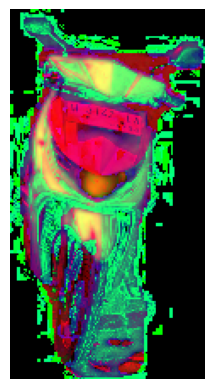

In [264]:
# Ubah citra menjadi ruang warna HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

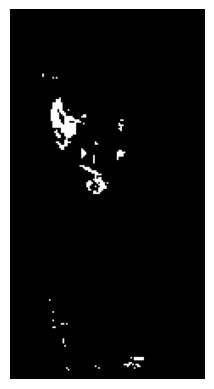

In [265]:
# Tentukan rentang warna putih dalam HSV
lower_white = np.array([-5, -1, 198])
upper_white = np.array([35, 120, 268])

# ower Bound: [ -5  -1 198]
# Upper Bound: [ 35  69 268]
 

# Buat mask dengan rentang warna putih
mask = cv2.inRange(hsv_image, lower_white, upper_white)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()

num 0 x:41 y:92 w:16 h:17 area:38.5 ratio:1.0625


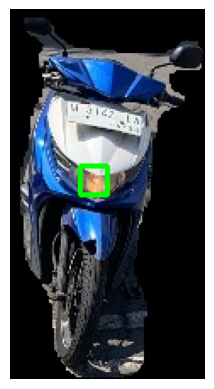

In [266]:
# Temukan kontur pada gambar hasil
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
count = 0 

# Gambar kotak pada setiap kontur
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    if area > 20 and area < 1000:
        ratio = h/w
        if ratio <= 1.4:
            print(f"num {count} x:{x} y:{y} w:{w} h:{h} area:{area} ratio:{ratio}")
            cv2.rectangle(image,(x,y),(x+w , y+h),(0,255,0),2)
            count += 1
    # print(contour)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Menghilangkan sumbu koordinat
plt.show()